In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import stop_words

from nltk.tokenize import sent_tokenize, word_tokenize

import os, sys
from glob import glob
import numpy as np
import gc 

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [27]:
def preprocess(raw_text):
    # tokenize
    tokens = word_tokenize(raw_text)    

    # drop to lowercase
    tokens = [word.lower() for word in tokens]
        
    # *step two* (default): remove non-alpha characters,
    # punctuation, and as many other "noise" elements as
    # possible. If dealing with a single character word,    
    # drop non-alphabetical characters. This will remove 
    # most punctuation but preserve many words containing
    # marks such as the '-' in 'self-emancipated'

    tmp_text=list()

    for word in tokens:
        if len(word) == 1:
            if word.isalpha == True:
                tmp_text.append(word)
        else:
             tmp_text.append(word)           
    tokens = tmp_text

    # now remove leading and trailing quotation marks,      
    # hyphens and  dashes
    tmp_text=list()
    drop_list = ['“','"','”','-','—']
    for i, word in enumerate(tokens):
        if word[0] in drop_list:
            word = word[1:]
        if word[-1:] in drop_list:
            word = word[:-1]
        
        word = word.replace("gyftis", "gifts")
        word = word.replace("gether", "gather")
        word = word.replace("spirituall", "spiritual")
        word = word.replace("feythfull", "faith")
        word = word.replace("wytnes", "witness")
        word = word.replace("almes", "alms")
        word = word.replace("desyre", "desire")
        word = word.replace("selfe", "self")
        word = word.replace("saffely", "safely")
        word = word.replace("realme", "realm")
        word = word.replace("acte", "act")
        word = word.replace("fourme", "form")
        word = word.replace("subiectes", "subjects")
        word = word.replace("theyr", "their")
        word = word.replace("kynde", "kind")
        word = word.replace("kynge", "king")
        word = word.replace("kyndes", "kinds")
        word = word.replace("vpon", "unto")
        word = word.replace("purueyours", "purveyors")
        word = word.replace("highnes", "highness")
        word = word.replace("euery", "every")
        word = word.replace("quene", "queen")
        word = word.replace("quenes", "queens")
        word = word.replace("whiche", "which")
        word = word.replace("bloude", "blood")
        word = word.replace("soueraine", "sovereign")
        
        if word.isdigit():
            word = ""
        
        # catch any zero-length words remaining
        if len(word) > 0:
            tmp_text.append(word)
        
    return(tmp_text)

In [47]:
import gzip

ccp_models = dict()

input_texts = ["../texts/henry/henry.tar.gz",
              "../texts/edward/edward.tar.gz",
              "../texts/mary/mary.tar.gz",
              "../texts/elizabeth/elizabeth.tar.gz",
              "../texts/james/james.tar.gz",
              "../texts/charles/charles.tar.gz"]

# setup vectorizer and process text

for fp in input_texts:
    
    model_name = os.path.basename(fp).split(".")[0]
    print("starting: {0}".format(model_name))

    print("loading gzipped texts...")
    raw_text = gzip.open(fp,'rt').read()
    
    print("preprocessing...")
    tokens = preprocess(raw_text)

    # simulate documents
    print("segmenting...")
    collection = list()
    segment_length = int(len(tokens)/1000)
    
    for j in range(1000):
        segment = tokens[segment_length*j:segment_length*(j+1)]
        collection.append(' '.join(segment))
        
    # free up memory
    del raw_text
    gc.collect()
    
    vec = CountVectorizer(input='content',
                      min_df=2,
                      stop_words = [",","the","and","of","or","to","in","shall","be","that","any","by",".",
              "such","as","this","for","same","all","said","other","'s",";",
              "her","is","every","[","]","they","within", "our", "not", "so",
              "made", "no", "then", ":", "do", "from", "if", "it", "which", "at", "with",
             "thereof","upon", "a", "because", "used", "some", "but", "aforesaid", "also",
             ")","(", "what", "&", "may", "are", "their", "them", "sayde", "suche", "shalbe", "anye", "sayd",
             "thesaid", "/", "...", "/", "either", "haue", "vnto", "thy", "did", "was", "were", "have", "thee", 
             "your", "thou", "unto", "hath", "had", "went", "has", "his", "an","does", "who", "most", "up","on",
                                   "would", "those", "much"],
                      lowercase=True)

    # train model (LDA)
    counts = vec.fit_transform(collection)
    dc, vc = counts.shape
    print("read {0} documents with {1} vocabulary".format(dc,vc))
    
    # Build the LDA Model
    # n_components = number of topics to extract (if topics are too similar, extract more)
 
    ccp_model = LatentDirichletAllocation(n_components=2,
                                            max_iter=5,
                                            learning_method='batch',
                                            random_state=1)
    ccp_models[model_name] = [ccp_model, counts, vec, collection]    

starting: henry
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 1690 vocabulary
starting: edward
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 6292 vocabulary
starting: mary
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 427 vocabulary
starting: elizabeth
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 5747 vocabulary
starting: james
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 9225 vocabulary
starting: charles
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 1489 vocabulary


henry:

Topic #0:
he christ god him we words faith my these thomist things can me will men when say church scripture bread henry against nothing mass there therefore only lord one concerning says should own king even scriptures let sacrament work defender authority here book body use nor more us word must how make time since believe man now paul its lies argument whole prove place without you away sacrifice articles taken both right papists nay luther sacraments new way part matter out thomists where written thus am thing pope themselves world except people wish over write than come reply holy spirit 

Topic #1:
he king my will should you one me thomist us good than men man now henry see into let himself great church can even against more been ye scripture god how grace luther thing after therefore say right nothing there like book 000000 here papacy thomas these time saint england saying itself its nor argument royal another before must very make first necessary we only reader word am

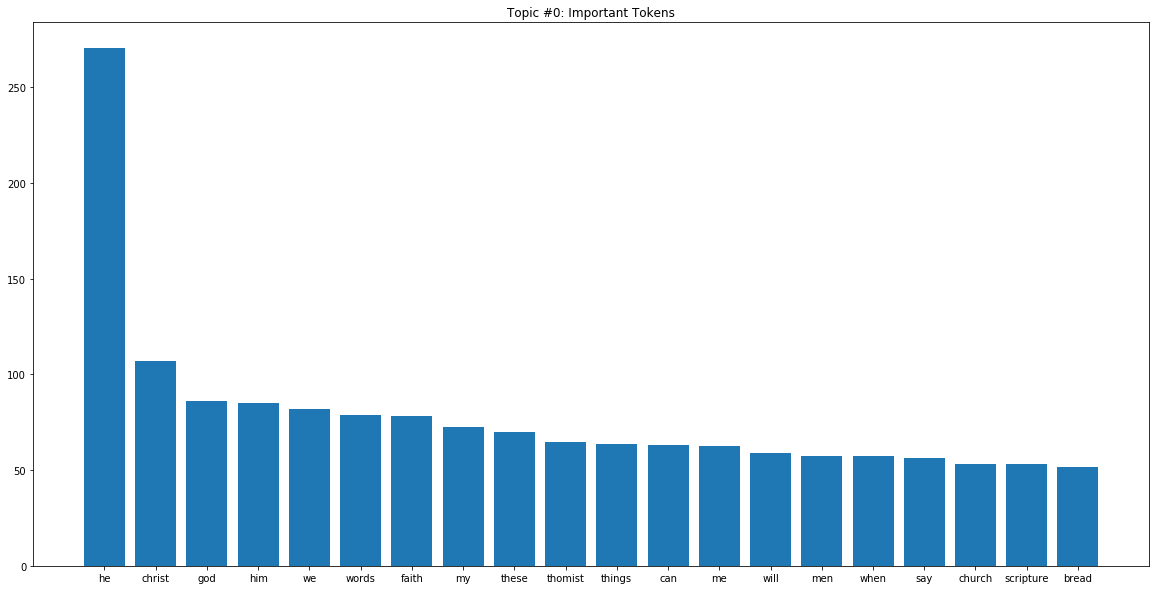

          Topic 0  Topic 1  Dominant Topic
Text 0      0.767    0.233               0
Text 1      0.054    0.946               1
Text 2      0.170    0.830               1
Text 3      0.042    0.958               1
Text 4      0.057    0.943               1
Text 5      0.039    0.961               1
Text 6      0.045    0.955               1
Text 7      0.049    0.951               1
Text 8      0.121    0.879               1
Text 9      0.412    0.588               1
Text 10     0.048    0.952               1
Text 11     0.047    0.953               1
Text 12     0.052    0.948               1
Text 13     0.059    0.941               1
Text 14     0.040    0.960               1
Text 15     0.217    0.783               1
Text 16     0.035    0.965               1
Text 17     0.039    0.961               1
Text 18     0.075    0.925               1
Text 19     0.031    0.969               1
Text 20     0.026    0.974               1
Text 21     0.051    0.949               1
Text 22    

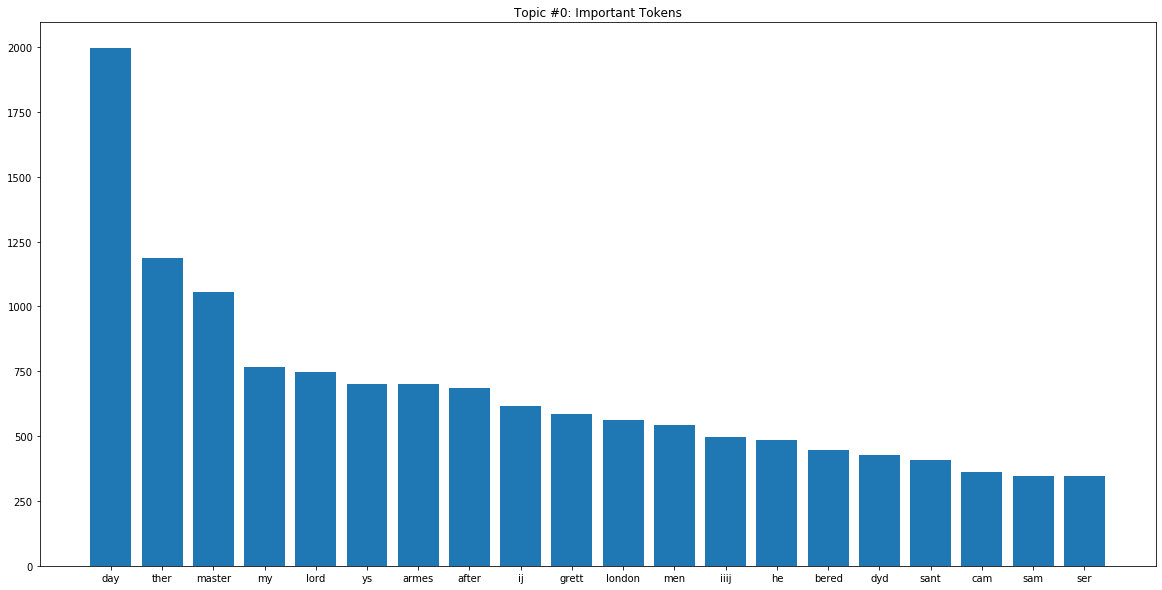

          Topic 0  Topic 1  Dominant Topic
Text 0      0.767    0.233               0
Text 1      0.054    0.946               1
Text 2      0.170    0.830               1
Text 3      0.042    0.958               1
Text 4      0.057    0.943               1
Text 5      0.039    0.961               1
Text 6      0.045    0.955               1
Text 7      0.049    0.951               1
Text 8      0.121    0.879               1
Text 9      0.412    0.588               1
Text 10     0.048    0.952               1
Text 11     0.047    0.953               1
Text 12     0.052    0.948               1
Text 13     0.059    0.941               1
Text 14     0.040    0.960               1
Text 15     0.217    0.783               1
Text 16     0.035    0.965               1
Text 17     0.039    0.961               1
Text 18     0.075    0.925               1
Text 19     0.031    0.969               1
Text 20     0.026    0.974               1
Text 21     0.051    0.949               1
Text 22    

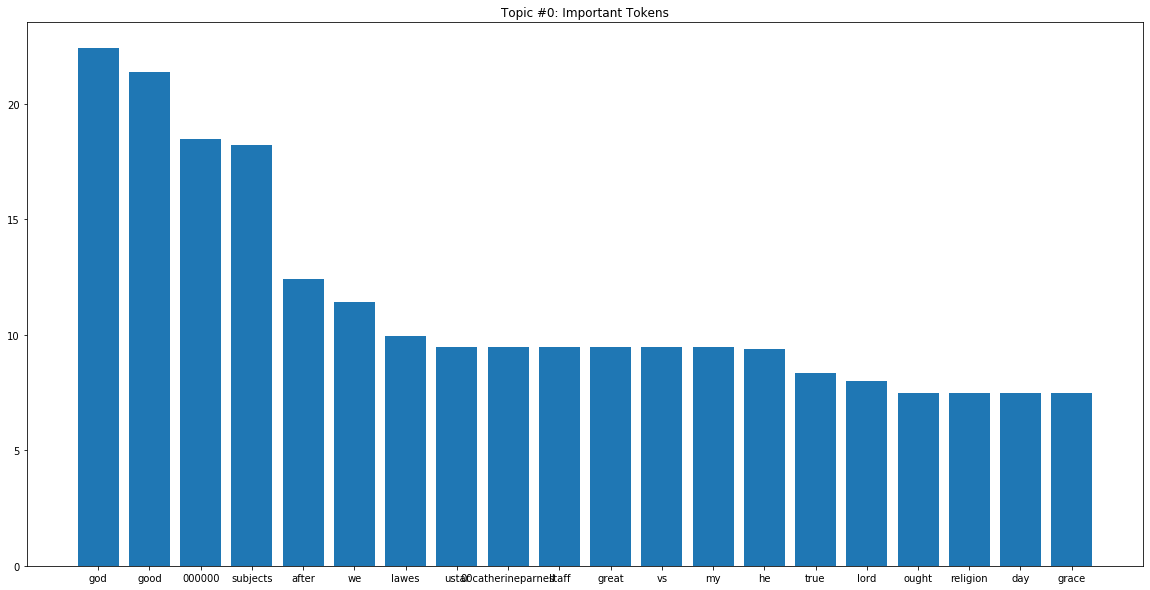

          Topic 0  Topic 1  Dominant Topic
Text 0      0.767    0.233               0
Text 1      0.054    0.946               1
Text 2      0.170    0.830               1
Text 3      0.042    0.958               1
Text 4      0.057    0.943               1
Text 5      0.039    0.961               1
Text 6      0.045    0.955               1
Text 7      0.049    0.951               1
Text 8      0.121    0.879               1
Text 9      0.412    0.588               1
Text 10     0.048    0.952               1
Text 11     0.047    0.953               1
Text 12     0.052    0.948               1
Text 13     0.059    0.941               1
Text 14     0.040    0.960               1
Text 15     0.217    0.783               1
Text 16     0.035    0.965               1
Text 17     0.039    0.961               1
Text 18     0.075    0.925               1
Text 19     0.031    0.969               1
Text 20     0.026    0.974               1
Text 21     0.051    0.949               1
Text 22    

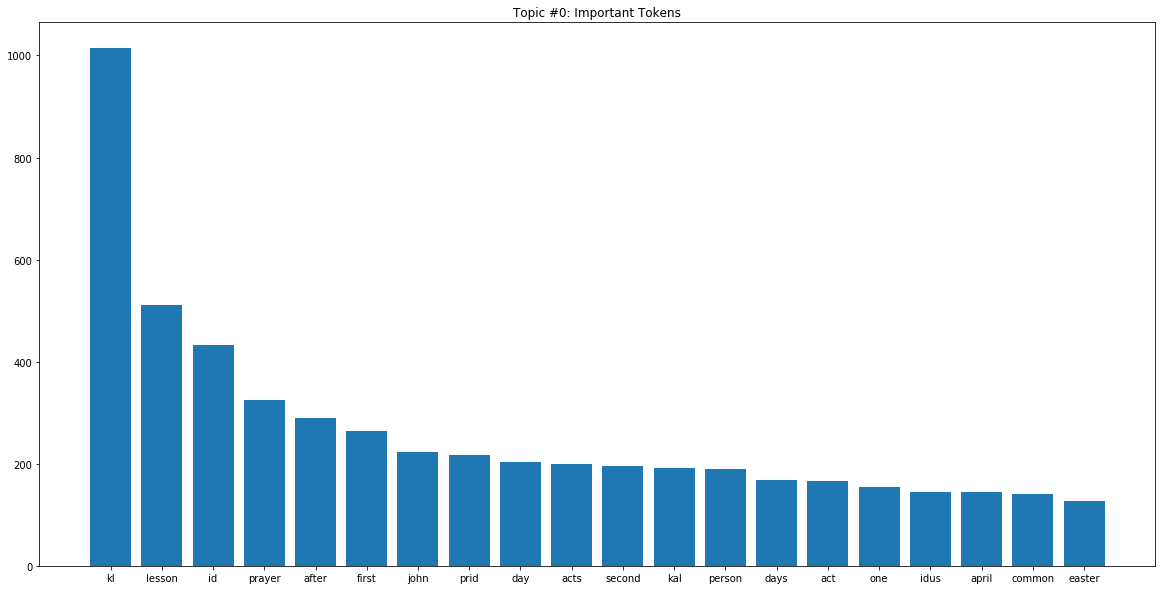

          Topic 0  Topic 1  Dominant Topic
Text 0      0.767    0.233               0
Text 1      0.054    0.946               1
Text 2      0.170    0.830               1
Text 3      0.042    0.958               1
Text 4      0.057    0.943               1
Text 5      0.039    0.961               1
Text 6      0.045    0.955               1
Text 7      0.049    0.951               1
Text 8      0.121    0.879               1
Text 9      0.412    0.588               1
Text 10     0.048    0.952               1
Text 11     0.047    0.953               1
Text 12     0.052    0.948               1
Text 13     0.059    0.941               1
Text 14     0.040    0.960               1
Text 15     0.217    0.783               1
Text 16     0.035    0.965               1
Text 17     0.039    0.961               1
Text 18     0.075    0.925               1
Text 19     0.031    0.969               1
Text 20     0.026    0.974               1
Text 21     0.051    0.949               1
Text 22    

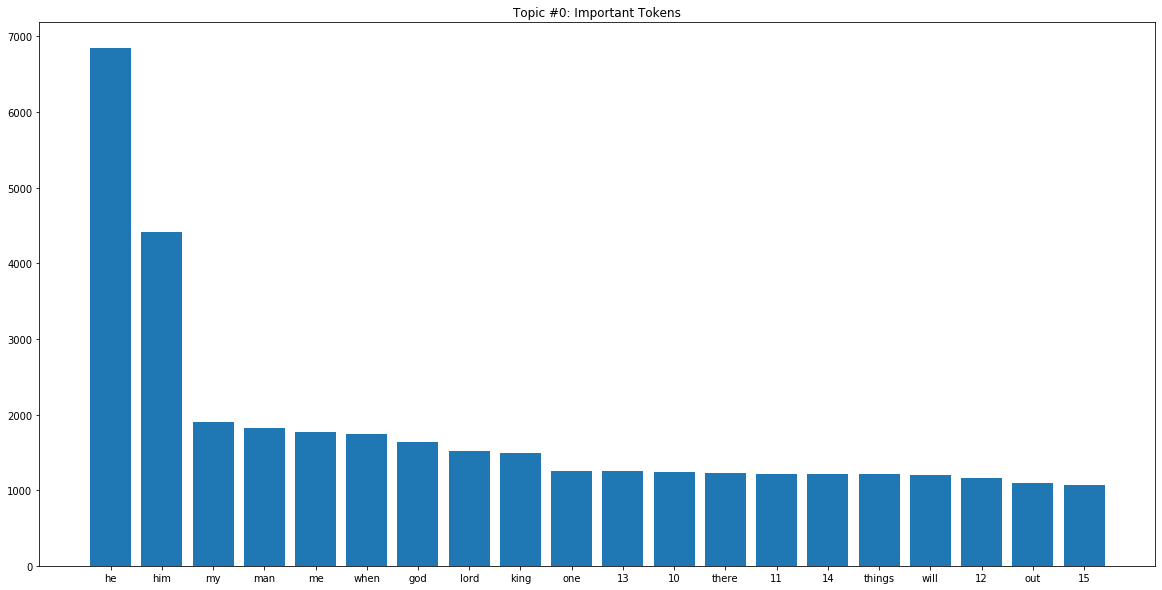

          Topic 0  Topic 1  Dominant Topic
Text 0      0.767    0.233               0
Text 1      0.054    0.946               1
Text 2      0.170    0.830               1
Text 3      0.042    0.958               1
Text 4      0.057    0.943               1
Text 5      0.039    0.961               1
Text 6      0.045    0.955               1
Text 7      0.049    0.951               1
Text 8      0.121    0.879               1
Text 9      0.412    0.588               1
Text 10     0.048    0.952               1
Text 11     0.047    0.953               1
Text 12     0.052    0.948               1
Text 13     0.059    0.941               1
Text 14     0.040    0.960               1
Text 15     0.217    0.783               1
Text 16     0.035    0.965               1
Text 17     0.039    0.961               1
Text 18     0.075    0.925               1
Text 19     0.031    0.969               1
Text 20     0.026    0.974               1
Text 21     0.051    0.949               1
Text 22    

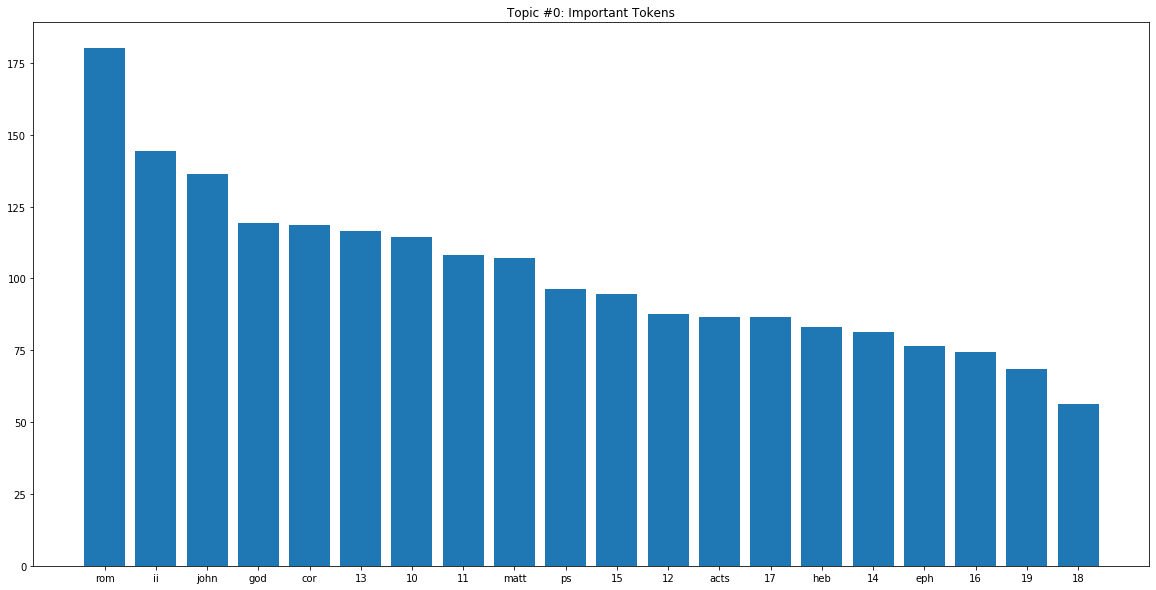

          Topic 0  Topic 1  Dominant Topic
Text 0      0.767    0.233               0
Text 1      0.054    0.946               1
Text 2      0.170    0.830               1
Text 3      0.042    0.958               1
Text 4      0.057    0.943               1
Text 5      0.039    0.961               1
Text 6      0.045    0.955               1
Text 7      0.049    0.951               1
Text 8      0.121    0.879               1
Text 9      0.412    0.588               1
Text 10     0.048    0.952               1
Text 11     0.047    0.953               1
Text 12     0.052    0.948               1
Text 13     0.059    0.941               1
Text 14     0.040    0.960               1
Text 15     0.217    0.783               1
Text 16     0.035    0.965               1
Text 17     0.039    0.961               1
Text 18     0.075    0.925               1
Text 19     0.031    0.969               1
Text 20     0.026    0.974               1
Text 21     0.051    0.949               1
Text 22    

In [48]:
for ccp_model_name in ccp_models:
    # get fitted data and transformed matrix
    ccp_data = ccp_models[ccp_model_name][0].fit(ccp_models[ccp_model_name][1])

    # extract the features to a simple list
    feature_names = ccp_models[ccp_model_name][2].get_feature_names()

    # how many words do we want to extract for each topic?
    n_words = 100
    
    print(ccp_model_name+":\n")
    # now produce topics
    for topic_idx, topic in enumerate(ccp_models[ccp_model_name][0].components_):
        print("Topic #%d:" % topic_idx)
        for i in topic.argsort()[:-n_words - 1:-1]:
            print("{0} ".format(feature_names[i]),end="")
        print("\n")
        
        # plot the words from the first topic
    data = ccp_models[ccp_model_name][0].components_[0]
    word_index = data.argsort()[:-20 - 1:-1]

    x = [feature_names[x] for x in word_index]
    y = [data[x] for x in word_index]

    plt.figure(figsize=(20,10))
    plt.title("Topic #0: Important Tokens")

    plt.xlabel("")
    plt.ylabel("")
    plt.bar(x,y)
    plt.show()

    ccp_transformed_data = ccp_models[ccp_model_name][0].fit_transform(counts)

    # make lists of topics and texts for labels
    topics = ["Topic " + str(i) for i in range(ccp_models[ccp_model_name][0].n_components)]
    texts = ["Text " + str(i) for i in range(len(ccp_models[ccp_model_name][3]))]

    # put data into a special datatype called a Pandas DataFrame
    topic_chart = pd.DataFrame(np.round(ccp_transformed_data, 3), columns=topics, index=texts)
    
    ccp_models[ccp_model_name].append(topic_chart)

    # extract the most dominant topic by searching for largest value
    topic_chart['Dominant Topic'] = np.argmax(topic_chart.values, axis=1)

    # Display
    print(topic_chart)